# **TELECHARGEMENT DES DONNEES**

In [ ]:
# !pip install torchvision
# !pip install -Uqq fastai
# !pip install -Uqq fastbook
# import fastai, fastbook
# fastai.__version__, fastbook.__version__
# from torchvision import datasets

In [ ]:
# from fastai.vision.all import *
# from fastbook import *

In [ ]:
# !pip install duckduckgo-search
# from duckduckgo_search import DDGS
# from fastcore.all import L

# def search_images_ddg(term, max_images=3000): # Reduced max_images per category to 250
#     """Search for images using DuckDuckGo and return a list of image URLs."""
#     with DDGS() as ddgs:
#         results = ddgs.images(keywords=term, max_results=max_images)
#         image_urls = [r.get("image") for r in results]
#     return L(image_urls)

# # Search terms for each category
# accident_terms = "car accident, road accident, traffic collision, car crash scene, accident aftermath, vehicle crash, motor vehicle accident, highway accident, fatal car crash, multi-vehicle collision"
# non_accident_terms = "cars on the road, traffic, normal traffic flow, busy street, urban traffic, highway traffic, rush hour traffic, smooth traffic, city traffic, traffic congestion"

# # Collect URLs for each category
# url_accident = search_images_ddg(accident_terms, max_images=3000)
# url_non_accident = search_images_ddg(non_accident_terms, max_images=3000)

# print("Accident URLs (first 3):", url_accident[:3])
# print("Non-Accident URLs (first 3):", url_non_accident[:3])

In [ ]:
# from fastai.vision.all import *
# from fastdownload import download_url

# #root
# root = Path('data')

# #paths and URLs
# path_urls = {
#     root/'accident': url_accident,
#     root/'non_accident': url_non_accident
# }

# for path in path_urls:
#     path.mkdir(exist_ok=True, parents=True)

#     download_images(path, urls=path_urls[path], max_pics=3000)

#     print(f"Number of images in {path}: {len(path.ls())}")

In [ ]:
#package
!pip install -Uqq fastai fastbook torchvision timm opencv-python
!pip install imagehash
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#package
from fastai.vision.all import *
from fastbook import *

# **Nettoyage & traitements des données**

### **Nettoyage**

In [3]:
#supprimé les données dupliqué
import os
import imagehash

def find_duplicates(image_dir):
    hashes = {}
    duplicates = []
    for filename in os.listdir(image_dir):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            filepath = os.path.join(image_dir, filename)
            with open(filepath, 'rb') as f:
                hash = imagehash.average_hash(Image.open(f))
            if hash in hashes:
                duplicates.append(filepath)
            else:
                hashes[hash] = filepath
    return duplicates

def remove_duplicates(duplicates):
    for file_path in duplicates:
        try:
            os.remove(file_path)
            print(f"Fichier supprimé : {file_path}")
        except OSError as e:
            print(f"Erreur lors de la suppression du fichier {file_path} : {e}")

duplicates_accident = find_duplicates('accident')
duplicates_non_accident = find_duplicates('non_accident')

remove_duplicates(duplicates_accident)
remove_duplicates(duplicates_non_accident)

Fichier supprimé : accident/875548c9-237d-4689-870e-f8ad04e9aeb6.jpg
Fichier supprimé : accident/bcb42366-7ae7-4854-af46-21e5e52a7825.jpg
Fichier supprimé : accident/9a6412cc-dc1c-4164-a333-17d83c7ceac2.jpg
Fichier supprimé : accident/6f9b88d3-4b48-462a-8d1e-f5cc32b0178c.jpg
Fichier supprimé : accident/37e07ade-6cc4-4bfe-aab7-424680d14455.jpg
Fichier supprimé : accident/a3a84416-b56b-45ef-ad26-77aad68f56d1.jpeg
Fichier supprimé : accident/f3efd0d6-9ba3-4844-8a24-ed1207fb5a60.jpeg
Fichier supprimé : accident/5e931067-0db8-4bb7-8f75-aa56197a9b00.jpg
Fichier supprimé : accident/c20e9551-091f-41d4-bb1a-64fc6940b32f.jpg
Fichier supprimé : accident/aa0ff9ad-6215-4a66-9ff5-da9611aa2452.jpg
Fichier supprimé : accident/938b478d-da72-4fec-98cc-b04fbcdb0adb.jpg
Fichier supprimé : accident/4742a2cf-6c4c-4871-87cf-1143270be6f7.jpg
Fichier supprimé : accident/1cdb680e-b4b0-4701-aa84-27f49690395d.jpg
Fichier supprimé : accident/3ab338ea-1ff8-4ad4-835e-82db489f557c.jpg
Fichier supprimé : accident/cb6b

In [4]:
#afficher le nombre de ficher dans chaque categorie
print(f"Nombre de fichiers dans le dossier 'accident': {len(os.listdir('accident'))}")
print(f"Nombre de fichiers dans le dossier 'non_accident': {len(os.listdir('non_accident'))}")

Nombre de fichiers dans le dossier 'accident': 230
Nombre de fichiers dans le dossier 'non_accident': 370


In [ ]:
#verification du format des données
from PIL import Image

def check_image_format(image_dir):
    for filename in os.listdir(image_dir):
        filepath = os.path.join(image_dir, filename)
        try:
            img = Image.open(filepath)
            if img.format not in ['JPEG', 'PNG', 'jpg']:
                print(f"Format d'image non pris en charge : {filepath} ({img.format})")
        except IOError:
            print(f"Impossible d'ouvrir l'image : {filepath}")

check_image_format('accident')
check_image_format('non_accident')

Format d'image non pris en charge : accident/e78d0cdc-5a07-4e34-a11c-1282574751b1.jpg (WEBP)
Format d'image non pris en charge : accident/14708875-4ba9-4b56-9e51-0d0bfe1debdb.jpg (WEBP)
Format d'image non pris en charge : accident/11f88705-d4f6-4d67-b01e-b72b9e25d00d.jpg (WEBP)
Format d'image non pris en charge : accident/f4f6fbc2-14c0-4564-9032-3e0aa68b3303.jpg (WEBP)
Format d'image non pris en charge : accident/3978e82d-85bd-480a-9e01-a48abf93f94e.jpg (WEBP)
Format d'image non pris en charge : accident/c5d4df3c-a41c-4555-99fe-a77bfad55903.jpg (WEBP)
Format d'image non pris en charge : accident/e95cae34-bd43-426e-85bf-46db306f8643.jpg (WEBP)
Format d'image non pris en charge : accident/ee9a15e6-eab3-41ad-912c-931c1ac22412.jpg (WEBP)
Format d'image non pris en charge : accident/fa11c24f-65ba-4a90-87ef-dcdfd9ed1f28.jpg (WEBP)
Format d'image non pris en charge : accident/8ba774f2-d148-49f2-b097-49d89b60b070.jpg (WEBP)
Format d'image non pris en charge : accident/3c5adf53-e7e1-48b1-b068-a

In [6]:
# suprimer le format de donnée snon pris en charge
def remove_unsupported_formats(image_dir, supported_formats=['JPEG', 'PNG', 'jpg']):
    for filename in os.listdir(image_dir):
        filepath = os.path.join(image_dir, filename)
        try:
            img = Image.open(filepath)
            if img.format not in supported_formats:
                os.remove(filepath)
                print(f"Fichier supprimé (format non pris en charge) : {filepath}")
        except IOError:
            print(f"Impossible d'ouvrir l'image : {filepath}")

remove_unsupported_formats('accident')
remove_unsupported_formats('non_accident')


Fichier supprimé (format non pris en charge) : accident/e78d0cdc-5a07-4e34-a11c-1282574751b1.jpg
Fichier supprimé (format non pris en charge) : accident/14708875-4ba9-4b56-9e51-0d0bfe1debdb.jpg
Fichier supprimé (format non pris en charge) : accident/11f88705-d4f6-4d67-b01e-b72b9e25d00d.jpg
Fichier supprimé (format non pris en charge) : accident/f4f6fbc2-14c0-4564-9032-3e0aa68b3303.jpg
Fichier supprimé (format non pris en charge) : accident/3978e82d-85bd-480a-9e01-a48abf93f94e.jpg
Fichier supprimé (format non pris en charge) : accident/c5d4df3c-a41c-4555-99fe-a77bfad55903.jpg
Fichier supprimé (format non pris en charge) : accident/e95cae34-bd43-426e-85bf-46db306f8643.jpg
Fichier supprimé (format non pris en charge) : accident/ee9a15e6-eab3-41ad-912c-931c1ac22412.jpg
Fichier supprimé (format non pris en charge) : accident/fa11c24f-65ba-4a90-87ef-dcdfd9ed1f28.jpg
Fichier supprimé (format non pris en charge) : accident/8ba774f2-d148-49f2-b097-49d89b60b070.jpg
Fichier supprimé (format non p

In [7]:
#suppression des données corrompu
def remove_corrupted_images(image_dir):
    for filename in os.listdir(image_dir):
        filepath = os.path.join(image_dir, filename)
        try:
            img = Image.open(filepath)
            img.verify()
        except (IOError, SyntaxError):
            print(f"Image corrompue : {filepath}")
            os.remove(filepath)
            print(f"Image corrompue supprimée : {filepath}")

remove_corrupted_images('accident')
remove_corrupted_images('non_accident')

In [8]:
#afficher le nombre de ficher dans chaque categorie
print(f"Nombre de fichiers dans le dossier 'accident': {len(os.listdir('accident'))}")
print(f"Nombre de fichiers dans le dossier 'non_accident': {len(os.listdir('non_accident'))}")

Nombre de fichiers dans le dossier 'accident': 157
Nombre de fichiers dans le dossier 'non_accident': 240


### **Redimmenssionne les images**

In [9]:
#redimension des images
def resize_images(image_dir, target_size=(224, 224)):
    for filename in os.listdir(image_dir):
        filepath = os.path.join(image_dir, filename)
        try:
            img = Image.open(filepath)
            img = img.resize(target_size)
            img.save(filepath)
        except IOError:
            print(f"Impossible d'ouvrir ou de redimensionner l'image : {filepath}")

resize_images('accident')
resize_images('non_accident')

Impossible d'ouvrir ou de redimensionner l'image : non_accident/5e48ba36-ad1b-4017-a392-19fdc035ca50.jpg


In [10]:
#afficher les dimmensions
def display_image_dimensions(image_dir):
    for filename in os.listdir(image_dir):
        filepath = os.path.join(image_dir, filename)
        try:
            img = Image.open(filepath)
            width, height = img.size
            print(f"Image: {filename}, Dimensions: {width}x{height}")
        except IOError:
            print(f"Impossible d'ouvrir l'image: {filepath}")

display_image_dimensions('accident')
display_image_dimensions('non_accident')

Image: c7e06fc4-74c1-4255-891a-56958601d2b4.jpg, Dimensions: 224x224
Image: 7c4edd01-f17d-4f71-a933-5c773316ea41.jpg, Dimensions: 224x224
Image: df60dbb3-404c-4ece-a0af-886bdb8ba9d7.jpg, Dimensions: 224x224
Image: 73ab86f2-04df-4c0e-a51c-35f0b22e598a.jpg, Dimensions: 224x224
Image: 1a6940e8-79ba-46a3-834e-62111fbbbbf9.jpg, Dimensions: 224x224
Image: 8d3620c4-89db-4374-b014-6b83817d61ca.jpg, Dimensions: 224x224
Image: 6afb523b-f6bb-4be1-81c6-0ac95109822e.jpg, Dimensions: 224x224
Image: e24816f7-c49c-470d-8562-e2dd6675019c.jpg, Dimensions: 224x224
Image: f0e98e5a-0609-43ad-bca2-5810a1e7869e.jpg, Dimensions: 224x224
Image: 1c211aed-7e56-48fe-8786-2fb586f6bb6e.jpeg, Dimensions: 224x224
Image: c3183d3a-1e14-4789-84fd-16e8604caf41.jpg, Dimensions: 224x224
Image: 02f6a756-9a30-4681-99ba-d74b7bc96757.png, Dimensions: 224x224
Image: f6d04a56-e881-47d6-b5e4-80ea8ccb1e38.jpg, Dimensions: 224x224
Image: 97f36d62-6da0-4140-b08a-8f39c5adf818.jpg, Dimensions: 224x224
Image: 1fef65c5-b071-4411-866f-e8

### **Normalisation**

In [11]:
#normalisation des pixel
import numpy as np

def normalize_images_01(image_dir):
  for filename in os.listdir(image_dir):
    filepath = os.path.join(image_dir, filename)
    try:
      img = Image.open(filepath)
      img_array = np.array(img, dtype=np.float32) / 255.0 
      img_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
      img_normalized.save(filepath)
    except IOError:
      print(f"Impossible d'ouvrir ou de normaliser l'image : {filepath}")

normalize_images_01('accident')
normalize_images_01('non_accident')

Impossible d'ouvrir ou de normaliser l'image : non_accident/1eb24028-c860-493d-ad61-d4f277cc5fd6.jpg
Impossible d'ouvrir ou de normaliser l'image : non_accident/5e48ba36-ad1b-4017-a392-19fdc035ca50.jpg


In [12]:

#suppression des images non traitées
def remove_corrupted_images(image_dir, corrupted_image_names):
    for filename in corrupted_image_names:
        filepath = os.path.join(image_dir, filename)
        try:
            os.remove(filepath)
            print(f"image corrompu supprimé: {filepath}")
        except OSError as e:
            print(f"erreur lors de la suppression: {filepath}: {e}")

image_dir = 'non_accident'
corrupted_image_names = [
    '1eb24028-c860-493d-ad61-d4f277cc5fd6.jpg',
    'e48ba36-ad1b-4017-a392-19fdc035ca50.jpg',
    '5e48ba36-ad1b-4017-a392-19fdc035ca50.jpg'
]

remove_corrupted_images(image_dir, corrupted_image_names)

image corrompu supprimé: non_accident/1eb24028-c860-493d-ad61-d4f277cc5fd6.jpg
erreur lors de la suppression: non_accident/e48ba36-ad1b-4017-a392-19fdc035ca50.jpg: [Errno 2] No such file or directory: 'non_accident/e48ba36-ad1b-4017-a392-19fdc035ca50.jpg'
image corrompu supprimé: non_accident/5e48ba36-ad1b-4017-a392-19fdc035ca50.jpg


In [13]:
#afficher le nombre de ficher dans chaque categorie
print(f"Nombre de fichiers dans le dossier 'accident': {len(os.listdir('accident'))}")
print(f"Nombre de fichiers dans le dossier 'non_accident': {len(os.listdir('non_accident'))}")

Nombre de fichiers dans le dossier 'accident': 157
Nombre de fichiers dans le dossier 'non_accident': 238


### **Augmentation des données**

In [14]:
#recherche d'image corrompu
import os
from PIL import Image, UnidentifiedImageError

def check_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            try:
                img_path = os.path.join(directory, filename)
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, SyntaxError, UnidentifiedImageError) as e:
                print(f"Image corrompue ou non reconnue: {img_path}")
                os.remove(img_path)  
check_images('accident')
check_images('non_accident')


In [15]:
import Augmentor
from PIL import UnidentifiedImageError

def augment_data(image_dir, num_samples):
    p = Augmentor.Pipeline(image_dir)
    
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)

    # Générez les nouvelles images 
    p.sample(num_samples)

augment_data('accident', 500)
augment_data('non_accident', 500)

Initialised with 157 image(s) found.
Output directory set to accident/output.

Processing <PIL.Image.Image image mode=RGB size=224x224>: 100%|██████████| 500/500 [00:00<00:00, 754.32 Samples/s]                   


Initialised with 238 image(s) found.
Output directory set to non_accident/output.

Processing <PIL.Image.Image image mode=RGB size=224x224>: 100%|██████████| 500/500 [00:00<00:00, 654.54 Samples/s]                  


In [16]:
#nombre de ficher dans chaque categorie
print(f"Nombre de fichiers dans le dossier 'accident': {len(os.listdir('accident'))}")
print(f"Nombre de fichiers dans le dossier 'non_accident': {len(os.listdir('non_accident'))}")
print(f"Nombre de fichiers dans le dossier 'accident/output': {len(os.listdir('accident/output'))}")
print(f"Nombre de fichiers dans le dossier 'non_accident/output': {len(os.listdir('non_accident/output'))}")


Nombre de fichiers dans le dossier 'accident': 158
Nombre de fichiers dans le dossier 'non_accident': 239
Nombre de fichiers dans le dossier 'accident/output': 500
Nombre de fichiers dans le dossier 'non_accident/output': 500


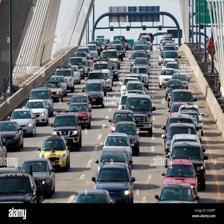

In [17]:
from IPython.display import Image

# afficher image non_accident
image_path = 'non_accident/4c77fbf8-a4c3-4425-9f1a-e721c08e16c1.jpg'
Image(filename=image_path)

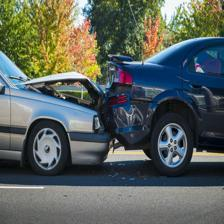

In [18]:
from IPython.display import Image

# afficher image accident
image_path = 'accident/9c5e20b3-c5c2-4527-8a41-b5ef222d4f1e.jpg'
Image(filename=image_path)


# **Model**

### **Séparation des données**

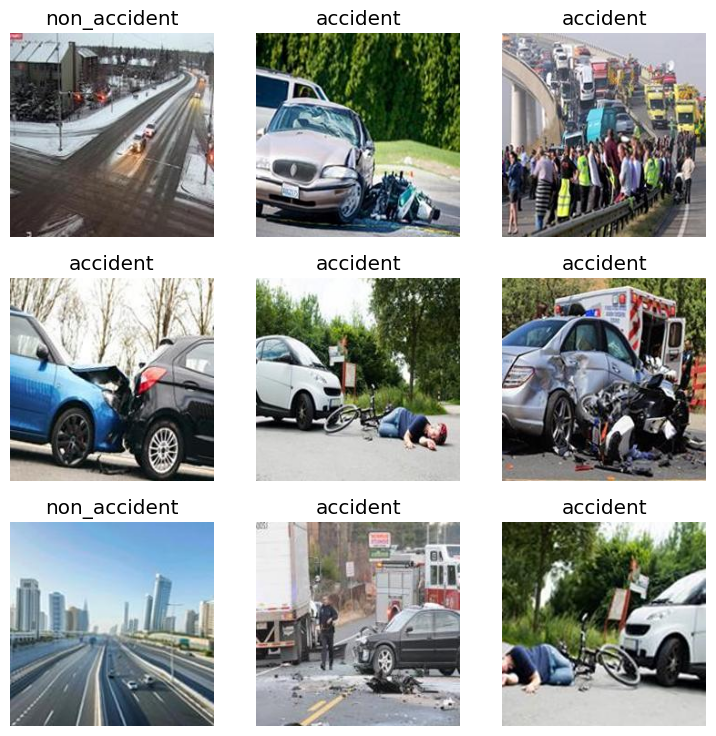

In [22]:
from fastai.vision.all import *

#path
root = Path('.') 
fnames = get_image_files(root/'accident/output') + get_image_files(root/'non_accident/output')

#label
def label_function(x): 
    return x.parent.parent.name 

#DataLoaders
dls = ImageDataLoaders.from_path_func(
    root, 
    fnames, 
    label_function,
    valid_pct=0.2, 
    seed=121, 
    bs=32,
    item_tfms=Resize(224)
)

dls.show_batch() 

In [23]:
# image d'entrainement
num_train_images = len(dls.train_ds)
print(f"Nombre d'images d'entraînement : {num_train_images}")

# image de test
num_valid_images = len(dls.valid_ds)
print(f"Nombre d'images de validation : {num_valid_images}")


Nombre d'images d'entraînement : 800
Nombre d'images de validation : 200


### **Entrainement**

In [24]:
#encapsule du modele 
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy, F1Score()])

##### modele1

lr_min: 0.0015848932787775993, lr_steep: 6.309573450380412e-07


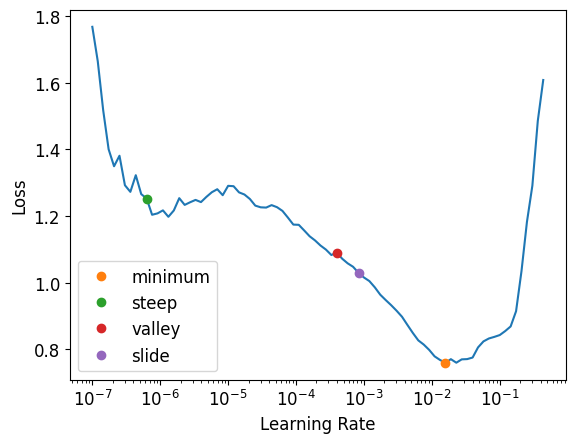

In [25]:
# taux d'apprentissage 
lrs1 = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# taux d'apprentissage suggérés
print(f"lr_min: {lrs1.minimum}, lr_steep: {lrs1.steep}")


lr_min étant trop élévé et lr_steep beaucoup plus bas, il serait préferable de les combiner

In [26]:

# lr_max
lr_max = (0.0015848932787775993 + 6.309573450380412e-07) / 2

print(f"lr_max: {lr_max}")

#20 époques
learn.fit_one_cycle(20, lr_max=lr_max)

lr_max: 0.0007927621180613187


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,time
0,0.998760,0.487061,0.245000,0.755000,0.756219,00:50
1,0.735982,0.262830,0.090000,0.910000,0.909091,00:49
2,0.518456,0.155409,0.055000,0.945000,0.944724,00:49
3,0.367307,0.168748,0.060000,0.940000,0.940000,00:51
4,0.267256,0.103403,0.040000,0.960000,0.960784,00:51
5,0.180052,0.079228,0.040000,0.960000,0.961165,00:50
6,0.121496,0.057524,0.025000,0.975000,0.975845,00:51
7,0.087115,0.075121,0.030000,0.970000,0.970874,00:50
8,0.073699,0.044525,0.010000,0.990000,0.990291,00:51
9,0.056580,0.061397,0.025000,0.975000,0.975369,01:11


##### Modele2

lr_min: 0.010000000149011612, lr_steep: 0.0006918309954926372


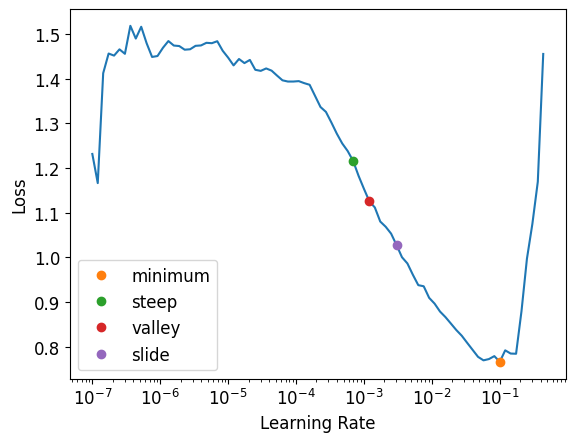

In [28]:
from fastai.callback.tracker import EarlyStoppingCallback

#architecture pré-entraînée
learn2 = vision_learner(dls, resnet34, metrics=[error_rate, accuracy, F1Score()], ps=0.5)

#taux d'apprentissage
lrs2 = learn2.lr_find(suggest_funcs=(minimum, steep, valley, slide))

#taux d'apprentissage suggérés
print(f"lr_min: {lrs2.minimum}, lr_steep: {lrs2.steep}")


In [29]:
#lr_max
lr_max = (0.010000000149011612 + 0.0006918309954926372) / 2
print(f"lr_max: {lr_max}")

#modèle avec early stopping
learn2.fit_one_cycle(10, lr_max=lr_max)

lr_max: 0.005345915572252125


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,time
0,0.611975,0.222443,0.075000,0.925000,0.924623,01:16
1,0.357437,0.218518,0.070000,0.930000,0.933962,01:15
2,0.243388,0.152695,0.040000,0.960000,0.961905,01:09
3,0.182673,0.220345,0.045000,0.955000,0.958525,01:06
4,0.140071,0.201323,0.040000,0.960000,0.960000,01:09
5,0.094653,0.030019,0.015000,0.985000,0.985646,01:12
6,0.078881,0.096562,0.030000,0.970000,0.970588,01:10
7,0.060228,0.033848,0.020000,0.980000,0.980392,01:06
8,0.040674,0.034093,0.015000,0.985000,0.985366,01:05
9,0.028317,0.024532,0.010000,0.990000,0.990291,01:10


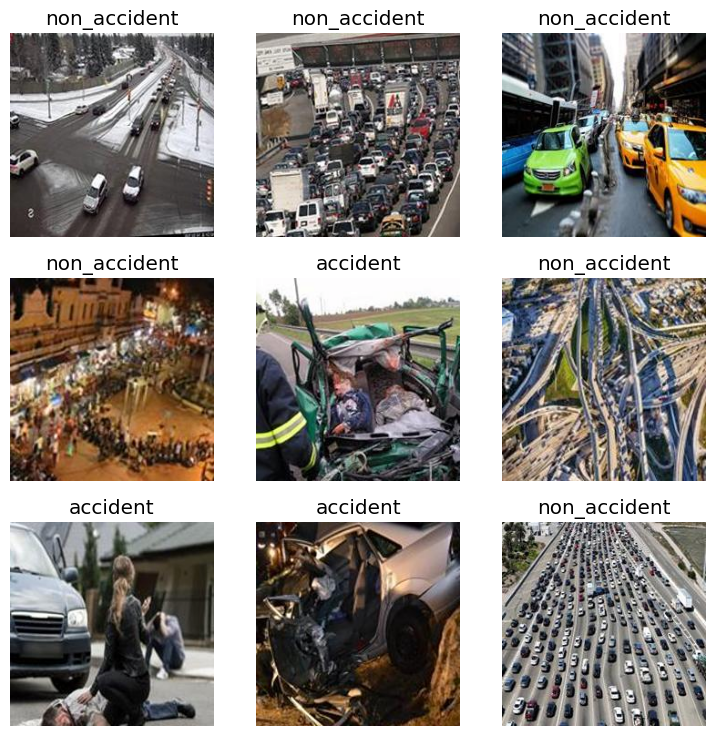

In [30]:
dls.show_batch()

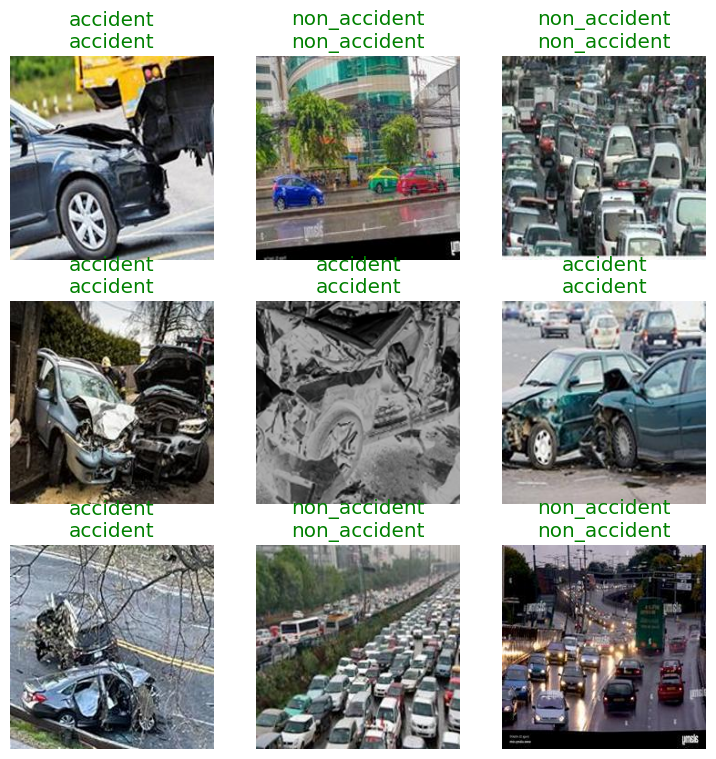

In [31]:
#résultats
learn2.show_results()

In [38]:
#sauvegarde du model
import joblib
joblib.dump(learn2, 'accident_detection.pkl')


['accident_detection.pkl']

In [2]:
import cloudpickle

# Sauvegarder le modèle
with open('accident2_detection.pkl', 'wb') as f:
    cloudpickle.dump(learn2, f)


NameError: name 'learn2' is not defined

# Test du model

In [34]:
#uploder
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

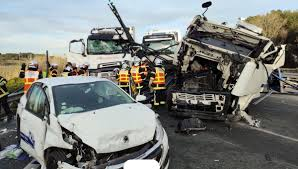

C'est une scène de : accident.
Probabilité d'accident': 0.9998


In [35]:
img1 = PILImage.create(uploader.data[0])
display(img1.to_thumb(400,400))
is_fight,_,probs = learn2.predict(img1)
print(f"C'est une scène de : {is_fight}.")
print(f"Probabilité d'accident': {probs[0]:.4f}")

In [36]:
#uploder
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

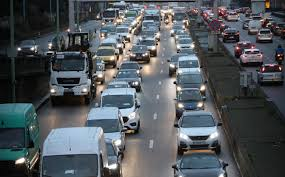

C'est une scène de : non_accident.
Probabilité d'accident': 0.0000


In [37]:
img1 = PILImage.create(uploader.data[0])
display(img1.to_thumb(400,400))
is_fight,_,probs = learn2.predict(img1)
print(f"C'est une scène de : {is_fight}.")
print(f"Probabilité d'accident': {probs[0]:.4f}")